In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

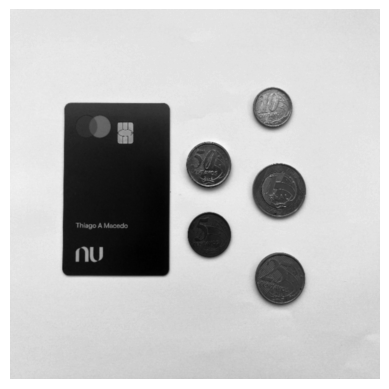

In [10]:
img = cv2.imread('fotos/img1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (720, 720))
img = cv2.GaussianBlur(img, (3,3), 0)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [12]:
def calculate_scaled_radius(scale_factor, original_radius):
    return int(round(original_radius * scale_factor))

scale_factor = 39.48598130841121
original_radius_5_cent = 1.05
scaled_radius_5_cent = calculate_scaled_radius(scale_factor, original_radius_5_cent)
scaled_radius_5_cent

41